![Banner del curso](https://docs.google.com/uc?export=download&id=1v9oXzOC5J_zT3_QLaVC47qIy67U1CO6b)

#Tutorial de estadística con programación

Este notebook sera un tutorial "gentil" para entender conceptos basicos de estadistica y poder jugar con ella, porque la estadistica se aprende mucho ams facil programandola.

![](https://i.stack.imgur.com/c88K3.png)

# Importacion de elementos

### Importacion de librerias necesarias

In [0]:
# Dependencies
%matplotlib inline
# Standard Dependencies
import os
import numpy as np
import pandas as pd
from math import sqrt

# Visualization
from pylab import *
import matplotlib.mlab as mlab
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import clear_output

# Statistics
from statistics import median
from scipy import signal
from scipy.special import factorial
import scipy.stats as stats
from scipy.stats import sem, binom, lognorm, poisson, bernoulli, spearmanr
from scipy.fftpack import fft, fftshift

### Importacion de los datos al computador

In [0]:
# Descargo los datos en mi maquina virtual
!wget --no-check-certificate 'https://docs.google.com/uc?export=download&id=1gS3HL72GGK1Prac9puPYFADKQgdED7XA' -O toy_dataset.csv
clear_output() 

df = pd.read_csv('toy_dataset.csv')

# Conceptos clave

### Variables discretas y continuas

- Una variable discreta es aquella que solo puede tomar determinados valores (matematicamente hablando tiene un dominio finito). En nuestros datos si podemos contar cuantos items del mismo tipo hay en todo el conjunto entonces es una variable discreta.
- Una variable continua es aquella que puede tomar infinitos valores o rangos intermedios entre las variables (dominio infinito). Por ejemplo la longitud de un vector es continuo.

### Funcion de probabilidad de masa (PMF)
Esta funcion define la probabilidad de todos los posibles valores de una variable aleatoria $x$ **discreta**. Por ejemplo vamos a ver la PMF de una distribucion binomial...

 ![](http://reliabilityace.com/formulas/binomial-pmf.png)

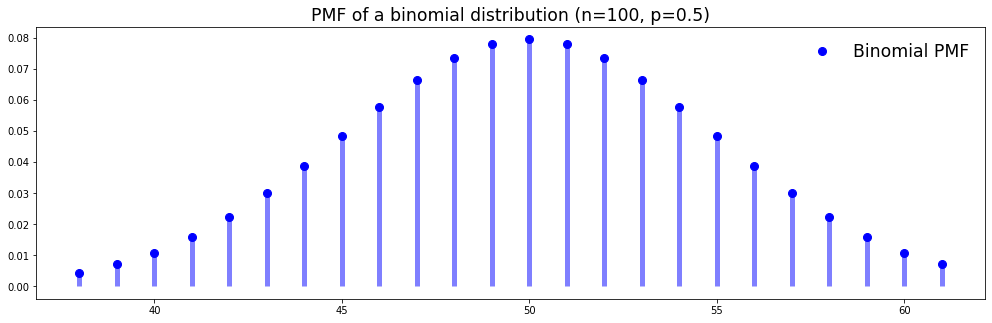

In [3]:
# PMF Visualization
n = 100
p = 0.5

fig, ax = plt.subplots(1, 1, figsize=(17,5))
x = np.arange(binom.ppf(0.01, n, p), binom.ppf(0.99, n, p))
ax.plot(x, binom.pmf(x, n, p), 'bo', ms=8, label='Binomial PMF')
ax.vlines(x, 0, binom.pmf(x, n, p), colors='b', lw=5, alpha=0.5)
rv = binom(n, p)
#ax.vlines(x, 0, rv.pmf(x), colors='k', linestyles='-', lw=1, label='frozen PMF')
ax.legend(loc='best', frameon=False, fontsize='xx-large')
plt.title('PMF of a binomial distribution (n=100, p=0.5)', fontsize='xx-large')
plt.show()

### Funcion de probabilidad de densidad (PDF)
Esta funcion define la probabilidad de todos los posibles valores de una variable aleatoria $x$ **continua**. Por ejemplo vamos a ver la PMF de una distribucion estandar o normal con media en 0 y desviacion de 1...

![](https://www.mhnederlof.nl/images/normalpdf.jpg)

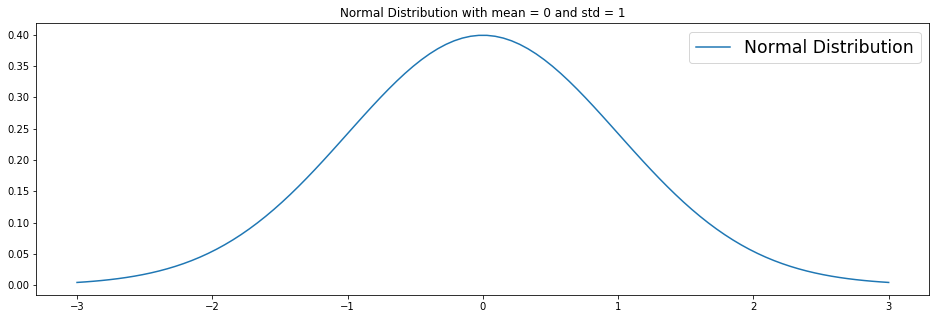

In [4]:
# Plot normal distribution
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(16,5))
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='Normal Distribution')
plt.title('Normal Distribution with mean = 0 and std = 1')
plt.legend(fontsize='xx-large')
plt.show()

### Funcion acumulativa de la distribucion (CDF)
Como su nombre lo corresponde a la funcion que va acumulando o sumando los valores de la probabilidad de la variable $x$ ya sea continua o discreta por todos los posibles valores.

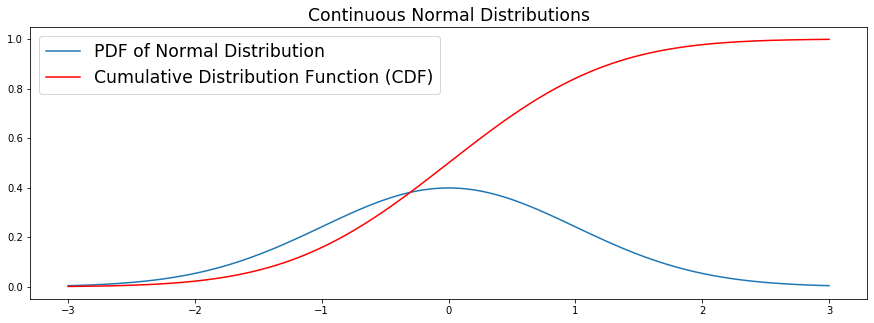

In [5]:
# Plot PDF and CDF of normal distribution
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
plt.figure(figsize=(15,5))
plt.title('Continuous Normal Distributions', fontsize='xx-large')
plt.plot(x, stats.norm.pdf(x, mu, sigma), label='PDF of Normal Distribution')
plot(x, stats.norm.cdf(x, mu, sigma), 'r', label='Cumulative Distribution Function (CDF)')
plt.legend(fontsize='xx-large')
plt.show()

### Ejercicio para resolver
¿Como calcularias la funcion de probabilidad acumulada anterior sin usar la libreria?

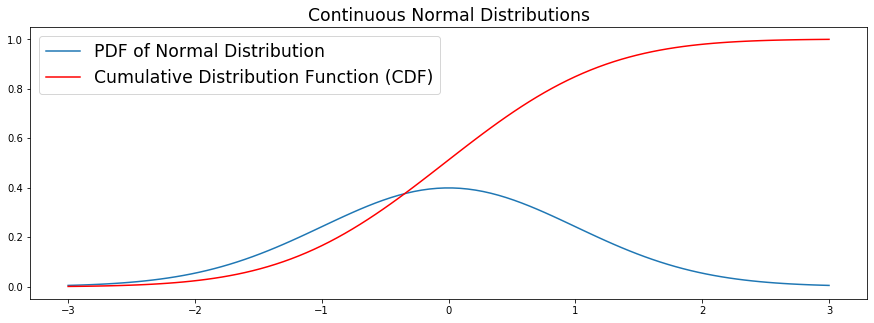

In [6]:
###  Inserta tu codigo aqui, el resultado tiene que quedar como la grafica
# Plot PDF and CDF of normal distribution
mu = 0
variance = 1
sigma = sqrt(variance)
x = np.linspace(mu - 3*sigma, mu + 3*sigma, 100)
y = stats.norm.pdf(x, mu, sigma)
plt.figure(figsize=(15,5))
plt.title('Continuous Normal Distributions', fontsize='xx-large')
plt.plot(x, y, label='PDF of Normal Distribution')
cdf = np.cumsum(y) / y.sum() 
plot(x, cdf, 'r', label='Cumulative Distribution Function (CDF)')
plt.legend(fontsize='xx-large')
plt.show()

### Distribuciones
La distribucion de probabilidad de una funcion nos da informacion de posibilidad o versimilitud de cada valor de la variable $x$.

¿Que mas podemos decir de las distribuciones?

#### Distribucion uniforme

Una distribución uniforme es bastante sencilla. Cada valor tiene un cambio igual de ocurrente. Por lo tanto, la distribución consiste en valores aleatorios sin patrones en ellos. En este ejemplo generamos números aleatorios flotantes entre 0 y 1.

<u>PDF</u>:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/648692e002b720347c6c981aeec2a8cca7f4182f)

<u>CDF</u>:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/eeeeb233753cfe775b24e3fec2f371ee8cdc63a6)

In [0]:
# Uniform distribution (between 0 and 1)
uniform_dist = np.random.random(1000)
uniform_df = pd.DataFrame({'value' : uniform_dist})
uniform_dist = pd.Series(uniform_dist)

Text(0.5, 1.0, 'Scatterplot of a Random/Uniform Distribution')

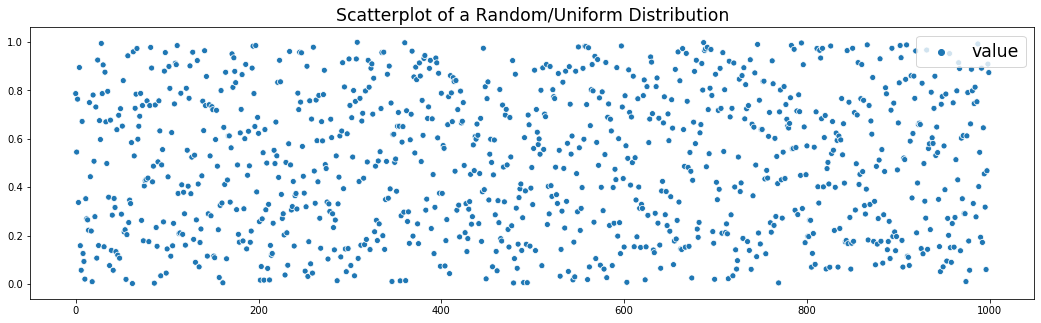

In [8]:
plt.figure(figsize=(18,5))
sns.scatterplot(data=uniform_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Random/Uniform Distribution', fontsize='xx-large')

Text(0.5, 1.0, 'Random/Uniform distribution')

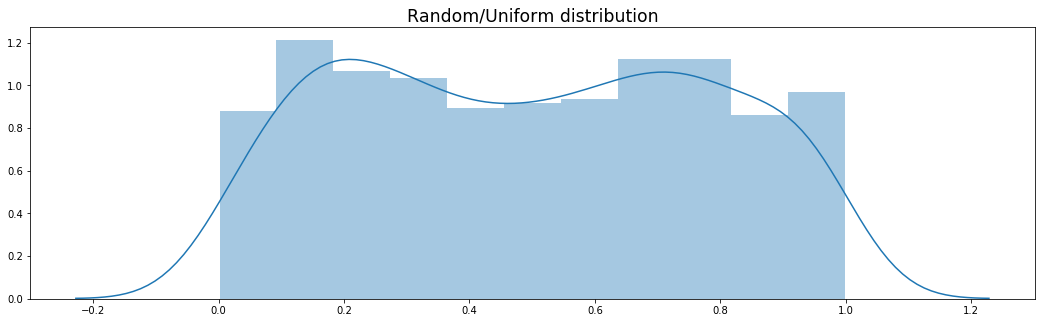

In [9]:
plt.figure(figsize=(18,5))
sns.distplot(uniform_df)
plt.title('Random/Uniform distribution', fontsize='xx-large')

#### Distribucion normal

Una distribución normal (también llamada Gaussiana o Curva de Campana) es muy común y conveniente. Esto se debe principalmente al [Teorema Central del Limite (CLT)](https://en.wikipedia.org/wiki/Central_limit_theorem), que establece que con una gran cantidad de variables aleatorias independientes (como los lanzamientos de monedas) la distribución tiende hacia una distribución normal.

<u>PDF</u>:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/2ce7e315b02666699e0cd8ea5fb1a3e0c287cd9d)

<u>CDF</u>:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/187f33664b79492eedf4406c66d67f9fe5f524ea)

In [0]:
# Generate Normal Distribution
normal_dist = np.random.randn(10000)
normal_df = pd.DataFrame({'value' : normal_dist})
# Create a Pandas Series for easy sample function
normal_dist = pd.Series(normal_dist)

Text(0.5, 1.0, 'Scatterplot of a Normal Distribution')

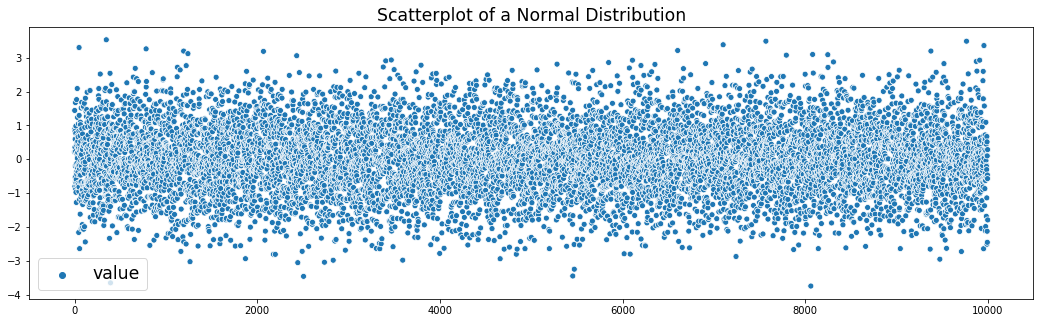

In [11]:
# Scatterplot
plt.figure(figsize=(18,5))
sns.scatterplot(data=normal_df)
plt.legend(fontsize='xx-large')
plt.title('Scatterplot of a Normal Distribution', fontsize='xx-large')

Text(0.5, 1.0, 'Normal distribution (n=10000)')

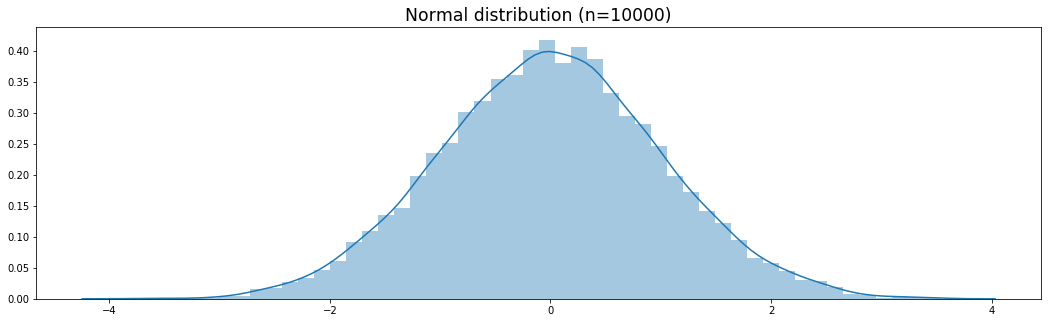

In [12]:
# Normal Distribution as a Bell Curve
plt.figure(figsize=(18,5))
sns.distplot(normal_df)
plt.title('Normal distribution (n={i})'.format(i=normal_df.shape[0]), fontsize='xx-large')

#### Distribucion Binomial

Una Distribución Binomial tiene un número contable de resultados y por lo tanto es discreta.

Las distribuciones de binomios deben cumplir los tres criterios siguientes:

1. El número de observaciones o ensayos es fijo. En otras palabras, sólo se puede calcular la probabilidad de que algo suceda si se hace un cierto número de veces.
2. Cada observación o ensayo es independiente. En otras palabras, ninguno de sus ensayos tiene un efecto en la probabilidad del próximo ensayo.
3. La probabilidad de éxito es exactamente la misma de un ensayo a otro.

Una explicación intuitiva de una distribución binomial es tirar una moneda 10 veces. Si tenemos una moneda justa (que ambas caras tienen igual probabilidad), nuestra posibilidad de conseguir cara (p) es de 0,50. Ahora tiramos la moneda 10 veces y contamos cuántas veces sale cara. En la mayoría de las situaciones tendremos cara 5 veces, pero también hay un cambio en el que tendremos cara 9 veces. El PMF de una distribución binomial dará estas probabilidades si decimos N = 10 y p = 0,5. Decimos que la x de cara es 1 y 0 de cruz.

<u>PMF</u>:

![](http://reliabilityace.com/formulas/binomial-pmf.png)

<u>CDF</u>:

![](http://reliabilityace.com/formulas/binomial-cpf.png)

Una **Distribución Bernoulli** es un caso especial de una Distribución Binomial donde se tiene $n=1$.

Todos los valores en una Distribución de Bernoulli son 0 o 1. 

Por ejemplo, si tomamos una moneda injusta que cae sobre las caras el 60% del tiempo, podemos describir la distribución de Bernoulli de la siguiente manera:

p (cambio a cara) = 0,6

1 - p (cambio a cruz) = 0,4

cara = 1

cruz = 0

Formalmente, podemos describir una distribución de Bernoulli con el siguiente <u>PDF</u>:

![](https://www.statisticshowto.datasciencecentral.com/wp-content/uploads/2016/07/pdf-bernoulli.png)

Text(0.5, 1.0, 'Bernoulli Distribution: p = 0.5, n = 1000')

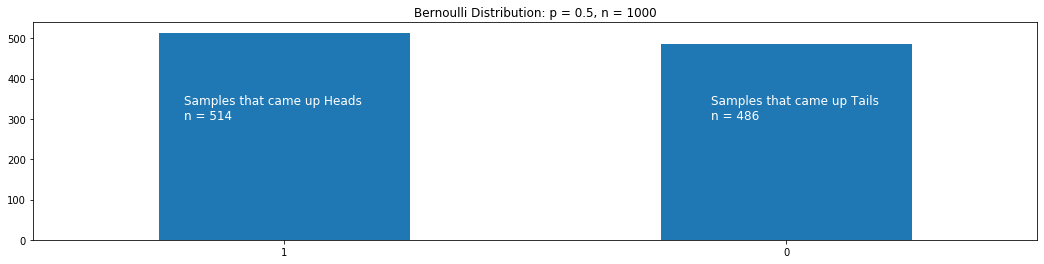

In [13]:
# Change of heads (outcome 1)
p = 0.5
n = 1000

# Create Bernoulli samples
bern_dist = bernoulli.rvs(p, size=n)
bern_df = pd.DataFrame({'value' : bern_dist})
bern_values = bern_df['value'].value_counts()

# Plot Distribution
plt.figure(figsize=(18,4))
bern_values.plot(kind='bar', rot=0)
plt.annotate(xy=(0.85,300), 
             s='Samples that came up Tails\nn = {}'.format(bern_values[0]), 
             fontsize='large', 
             color='white')
plt.annotate(xy=(-0.2,300), 
             s='Samples that came up Heads\nn = {}'.format(bern_values[1]), 
             fontsize='large', 
             color='white')
plt.title('Bernoulli Distribution: p = {i}, n = {j}'.format(i=p,j=n))

#### Distribucion de Poisson

La distribución Poisson es una distribución discreta y es popular para modelar el número de veces que un evento ocurre en un intervalo de tiempo o espacio. 

Toma un valor lambda, que es igual a la media de la distribución.

<u>PMF</u>: 

![](https://study.com/cimages/multimages/16/poisson1a.jpg)

<u>CDF</u>: 

![](http://www.jennessent.com/images/cdf_poisson.gif)

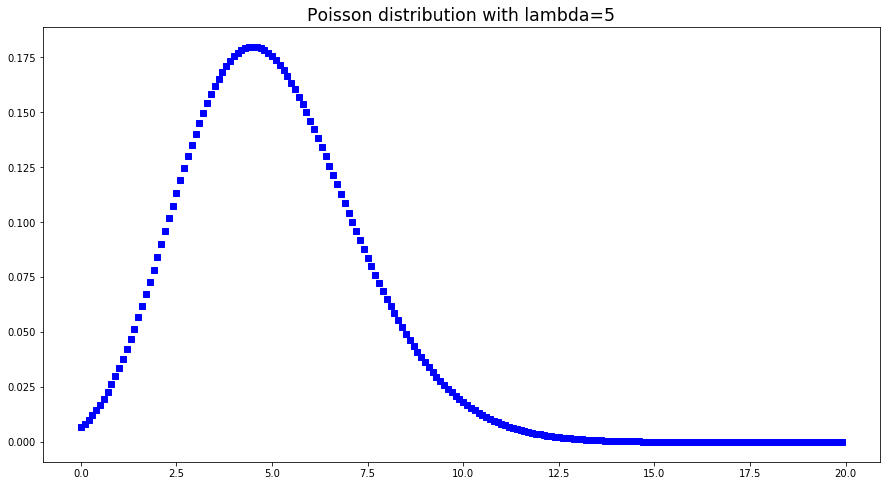

In [14]:
lam = 5
x = np.arange(0, 20, 0.1)
y = np.exp(-lam)*np.power(lam, x)/factorial(x)

plt.figure(figsize=(15,8))
plt.title('Poisson distribution with lambda={l}'.format(l=lam), fontsize='xx-large')
plt.plot(x, y, 'bs')
plt.show()

#### Distribucion Logaritmica Normal
Una distribución log-normal es continua. La característica principal de una distribución log-normal es que su logaritmo se distribuye normalmente. También se le conoce como la distribución de Galton.

<u>PDF</u>:

![](https://www.mhnederlof.nl/images/lognormaldensity.jpg)

<u>CDF</u>:

![](https://wikimedia.org/api/rest_v1/media/math/render/svg/29095d9cbd6539833d549c59149b9fc5bd06339b)

Donde $\Phi$ es la CDF de la distribucion normal.


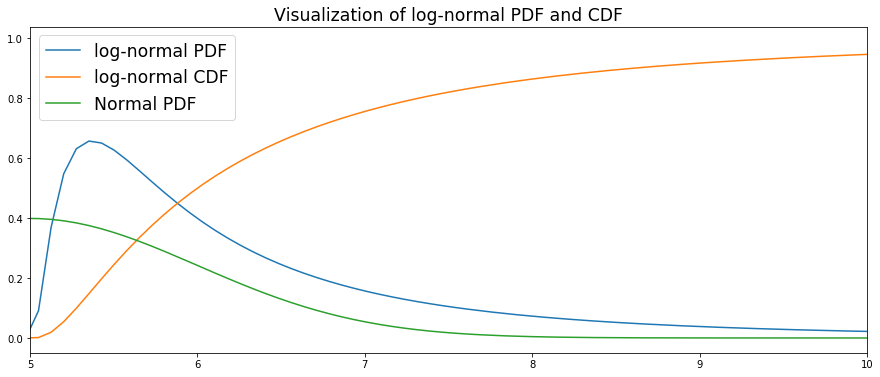

In [15]:
# Specify standard deviation and mean
std = 1
mean = 5

# Create log-normal distribution
dist=lognorm(std,loc=mean)
x=np.linspace(0,15,200)

# Visualize log-normal distribution
plt.figure(figsize=(15,6))
plt.xlim(5, 10)
plt.plot(x,dist.pdf(x), label='log-normal PDF')
plt.plot(x,dist.cdf(x), label='log-normal CDF')
plt.plot(x,stats.norm.pdf(x, mean, std), label="Normal PDF")
plt.legend(fontsize='xx-large')
plt.title('Visualization of log-normal PDF and CDF', fontsize='xx-large')
plt.show()

### Medidas estadisticas y Momentos

#### Media, mediana y moda

**Nota**: La media tambien se conoce como el primero momento.

![](https://qph.fs.quoracdn.net/main-qimg-29a4925034e075f16e1c743a4b3dda8b)

#### Momentos
Un momento es una medida cuantitativa que nos indica algo acerca de la forma de la distribucion. Se suelen subdividir en **momentos centrales y no centrales** pero en este curso vamos a tratar unicamente los centrales (enfocados en la obtencion de la ubicacion y probabilidad de los elementos).

- El momento 0th corresponde a la probabilidad total o Esperanza de esa variable.
- El primer momento corresponde a la media.
- El segundo momento es la varianza.
- El tercer momento es la asimetria (en ingles conocido como skewness).
- El cuarto momento es la curtosis (en infles conocido como kurtosis).

##### Varianza
El promedio de la distancia cuadrada de la media. La varianza es interesante en un sentido matemático, pero la desviación estándar es a menudo una medida mucho mejor de la extensión de la distribución.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_variance.png)

##### Desviacion estandar
La raiz cuadrada de la varianza.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_std_dev.png)

##### Asimetria
Una medida que describe el contraste entre una cola y la otra. Por ejemplo, si hay más valores altos en su distribución que valores bajos, entonces su distribución está "sesgada" hacia los valores altos.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_skewness.png)

##### Curtosis
Una medida de cuán "anchas" son las colas en la distribución.

![](http://www.visualmining.com/wp-content/uploads/2013/02/analytics_formula_kurtosis.png)

**"Cuanto más alto es el momento, más difícil es estimarlos con datos. Se requieren datos más grandes para obtener buenas estimaciones."**

#### Pregunta para el estudiante
`¿Con que nos referimos a datos mas grandes? ¿Mas columnas, mas filas, mas de ambas?`

Haz doble clic (o pulsa Intro) para editar

In [16]:
# Summary
print('Summary Statistics for a normal distribution: ')
# Median
medi = median(normal_dist)
print('Median: ', medi)
display(normal_df.describe())

# Standard Deviation
std = sqrt(np.var(normal_dist))

print('The first four calculated moments of a normal distribution: ')
# Mean
mean = normal_dist.mean()
print('Mean: ', mean)

# Variance
var = np.var(normal_dist)
print('Variance: ', var)

# Return unbiased skew normalized by N-1
skew = normal_df['value'].skew()
print('Skewness: ', skew)

# Return unbiased kurtosis over requested axis using Fisher’s definition of kurtosis 
# (kurtosis of normal == 0.0) normalized by N-1
kurt = normal_df['value'].kurtosis()
print('Kurtosis: ', kurt)

Summary Statistics for a normal distribution: 
Median:  0.0005300384556774492


,value
count,10000.000000
mean,0.004928
std,1.003975
min,-3.741945
25%,-0.670652
50%,0.000530
75%,0.677354
max,3.527906


The first four calculated moments of a normal distribution: 
Mean:  0.0049282593305700045
Variance:  1.007864417133567
Skewness:  0.026272925200447404
Kurtosis:  -0.024466536909405256


#### Metodos de muestreo de datos

##### No representativos 
- **Muestreo de conveniencia:** Elija las muestras que le resulten más convenientes, como la parte superior de un estante o personas a las que se pueda acercar fácilmente.
- **Muestreo del Peligro Feliz:** Tomar muestras sin pensar en ello. Esto a menudo da la toma de la ilusión de que usted está eligiendo muestras al azar.
- **Muestreo intencional:** Tomar muestras para un propósito específico. Un ejemplo es centrarse en casos extremos. Esto puede ser útil, pero es limitado porque no permite hacer declaraciones sobre toda la población.

##### Representativos
- **Muestreo aleatorio simple:** Escoja las muestras (pseudo)aleatoriamente.
- **Muestreo Sistematico:** Escoja las muestras con un intervalo fijo. Por ejemplo cada 10 muestras (0, 10, 20, etc).
- **Muestreo Estratificado:** Escoja la misma cantidad de muestras de diferentes grupos (estratos o clases) en la poblacion.
- **Muestreo por Cluster:** Divida la poblacion en grupos (clusters) y escoja los elementos desde esos grupos.

In [0]:
# Note that we take very small samples just to illustrate the different sampling methods

print('---Non-Representative samples:---\n')
# Convenience samples
con_samples = normal_dist[0:5]
print('Convenience samples:\n\n{}\n'.format(con_samples))

# Haphazard samples (Picking out some numbers)
hap_samples = [normal_dist[12], normal_dist[55], normal_dist[582], normal_dist[821], normal_dist[999]]
print('Haphazard samples:\n\n{}\n'.format(hap_samples))

# Purposive samples (Pick samples for a specific purpose)
# In this example we pick the 5 highest values in our distribution
purp_samples = normal_dist.nlargest(n=5)
print('Purposive samples:\n\n{}\n'.format(purp_samples))

print('---Representative samples:---\n')

# Simple (pseudo)random sample
rand_samples = normal_dist.sample(5)
print('Random samples:\n\n{}\n'.format(rand_samples))

# Systematic sample (Every 2000th value)
sys_samples = normal_dist[normal_dist.index % 2000 == 0]
print('Systematic samples:\n\n{}\n'.format(sys_samples))

# Stratified Sampling
# We will get 1 person from every city in the dataset
# We have 8 cities so that makes a total of 8 samples
df = pd.read_csv('toy_dataset.csv')

strat_samples = []

for city in df['City'].unique():
    samp = df[df['City'] == city].sample(1)
    strat_samples.append(samp['Income'].item())
    
print('Stratified samples:\n\n{}\n'.format(strat_samples))

# Cluster Sampling
# Make random clusters of ten people (Here with replacement)
c1 = normal_dist.sample(10)
c2 = normal_dist.sample(10)
c3 = normal_dist.sample(10)
c4 = normal_dist.sample(10)
c5 = normal_dist.sample(10)

# Take sample from every cluster (with replacement)
clusters = [c1,c2,c3,c4,c5]
cluster_samples = []
for c in clusters:
    clus_samp = c.sample(1)
    cluster_samples.extend(clus_samp)
print('Cluster samples:\n\n{}'.format(cluster_samples))    


---Non-Representative samples:---

Convenience samples:

0   -0.102350
1    0.827549
2   -0.288740
3    0.230136
4   -0.575799
dtype: float64

Haphazard samples:

[-0.18794963157824437, -0.7627403768882532, 0.745995567020822, -0.8246943030771302, 1.4733154255119238]

Purposive samples:

8998    3.802470
8061    3.622708
7062    3.415620
6242    3.297133
2818    3.289475
dtype: float64

---Representative samples:---

Random samples:

417     0.580013
8201   -0.587458
9093   -1.135197
277    -0.596497
1027   -0.890021
dtype: float64

Systematic samples:

0      -0.102350
2000   -0.758152
4000    0.188078
6000   -1.449246
8000   -0.795049
dtype: float64

Stratified samples:

[58509.0, 119136.0, 107490.0, 135219.0, 88048.0, 76064.0, 93010.0, 88765.0]

Cluster samples:

[-0.056807158744291944, -1.1733528641345472, -0.15900377633847193, -0.3699867190283769, 0.09683228675163556]


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:35: FutureWarning: `item` has been deprecated and will be removed in a future version


In [0]:
df.columns

Index(['Date', 'Unnamed: 1', 'Berri1', 'Maisonneuve_1', 'Maisonneuve_2',
       'Brébeuf'],
      dtype='object')

# Referencia

- [Tutorial de Estadistica basico](https://github.com/CarloLepelaars/stats_tutorial)